In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 
import datetime as dtime

In [2]:
data = pd.read_csv(r"C:\Users\dwigh\Downloads\2013_Green_Taxi_Trip_Data_20241028.csv")
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)
data['time_diff'] = (data.dropoff_datetime - data.pickup_datetime).dt.total_seconds().div(60)
data.sort_values('pickup_datetime', inplace=True)
data.head()


,vendor_id,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,...,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude,time_diff
499602,2,2013-08-01 08:14:37,2013-08-01 09:09:06,N,1,0.0,1,0.0,21.25,0.0,...,0.0,0.0,NaN,21.25,2,NaN,0.0,0.0,0.0,54.483333
113592,2,2013-08-01 09:13:00,2013-08-01 11:38:00,N,1,0.0,2,0.0,74.50,0.0,...,0.0,0.0,NaN,75.00,2,NaN,0.0,0.0,0.0,145.000000
391778,2,2013-08-01 09:48:00,2013-08-01 09:49:00,N,5,0.0,1,0.0,1.00,0.1,...,0.0,1.0,NaN,2.10,2,NaN,0.0,0.0,0.0,1.000000
87940,2,2013-08-01 10:38:35,2013-08-01 10:38:51,N,1,0.0,1,0.0,3.25,0.0,...,0.0,0.0,NaN,3.25,2,NaN,0.0,0.0,0.0,0.266667
299597,2,2013-08-01 11:51:45,2013-08-01 12:03:52,N,1,0.0,1,0.0,8.50,0.0,...,0.0,0.0,NaN,9.00,2,NaN,0.0,0.0,0.0,12.116667


In [3]:
data.drop(columns=['Ehail_fee'], inplace=True)

In [4]:
data['day_of_week'] = data['pickup_datetime'].dt.day_name()
data['month'] = data.pickup_datetime.dt.month_name()
data['hour'] = data.pickup_datetime.dt.hour

In [5]:
mon_dow_hr = data.groupby(['vendor_id','month','day_of_week','hour'], as_index=False)[['Total_amount']].sum()
mon_dow = data.groupby(['vendor_id','month','day_of_week'], as_index=False)[['Total_amount']].sum()
month = data.groupby('month', as_index=False)[['Total_amount']].sum()
dow = data.groupby('day_of_week', as_index=False)[['Total_amount']].sum()

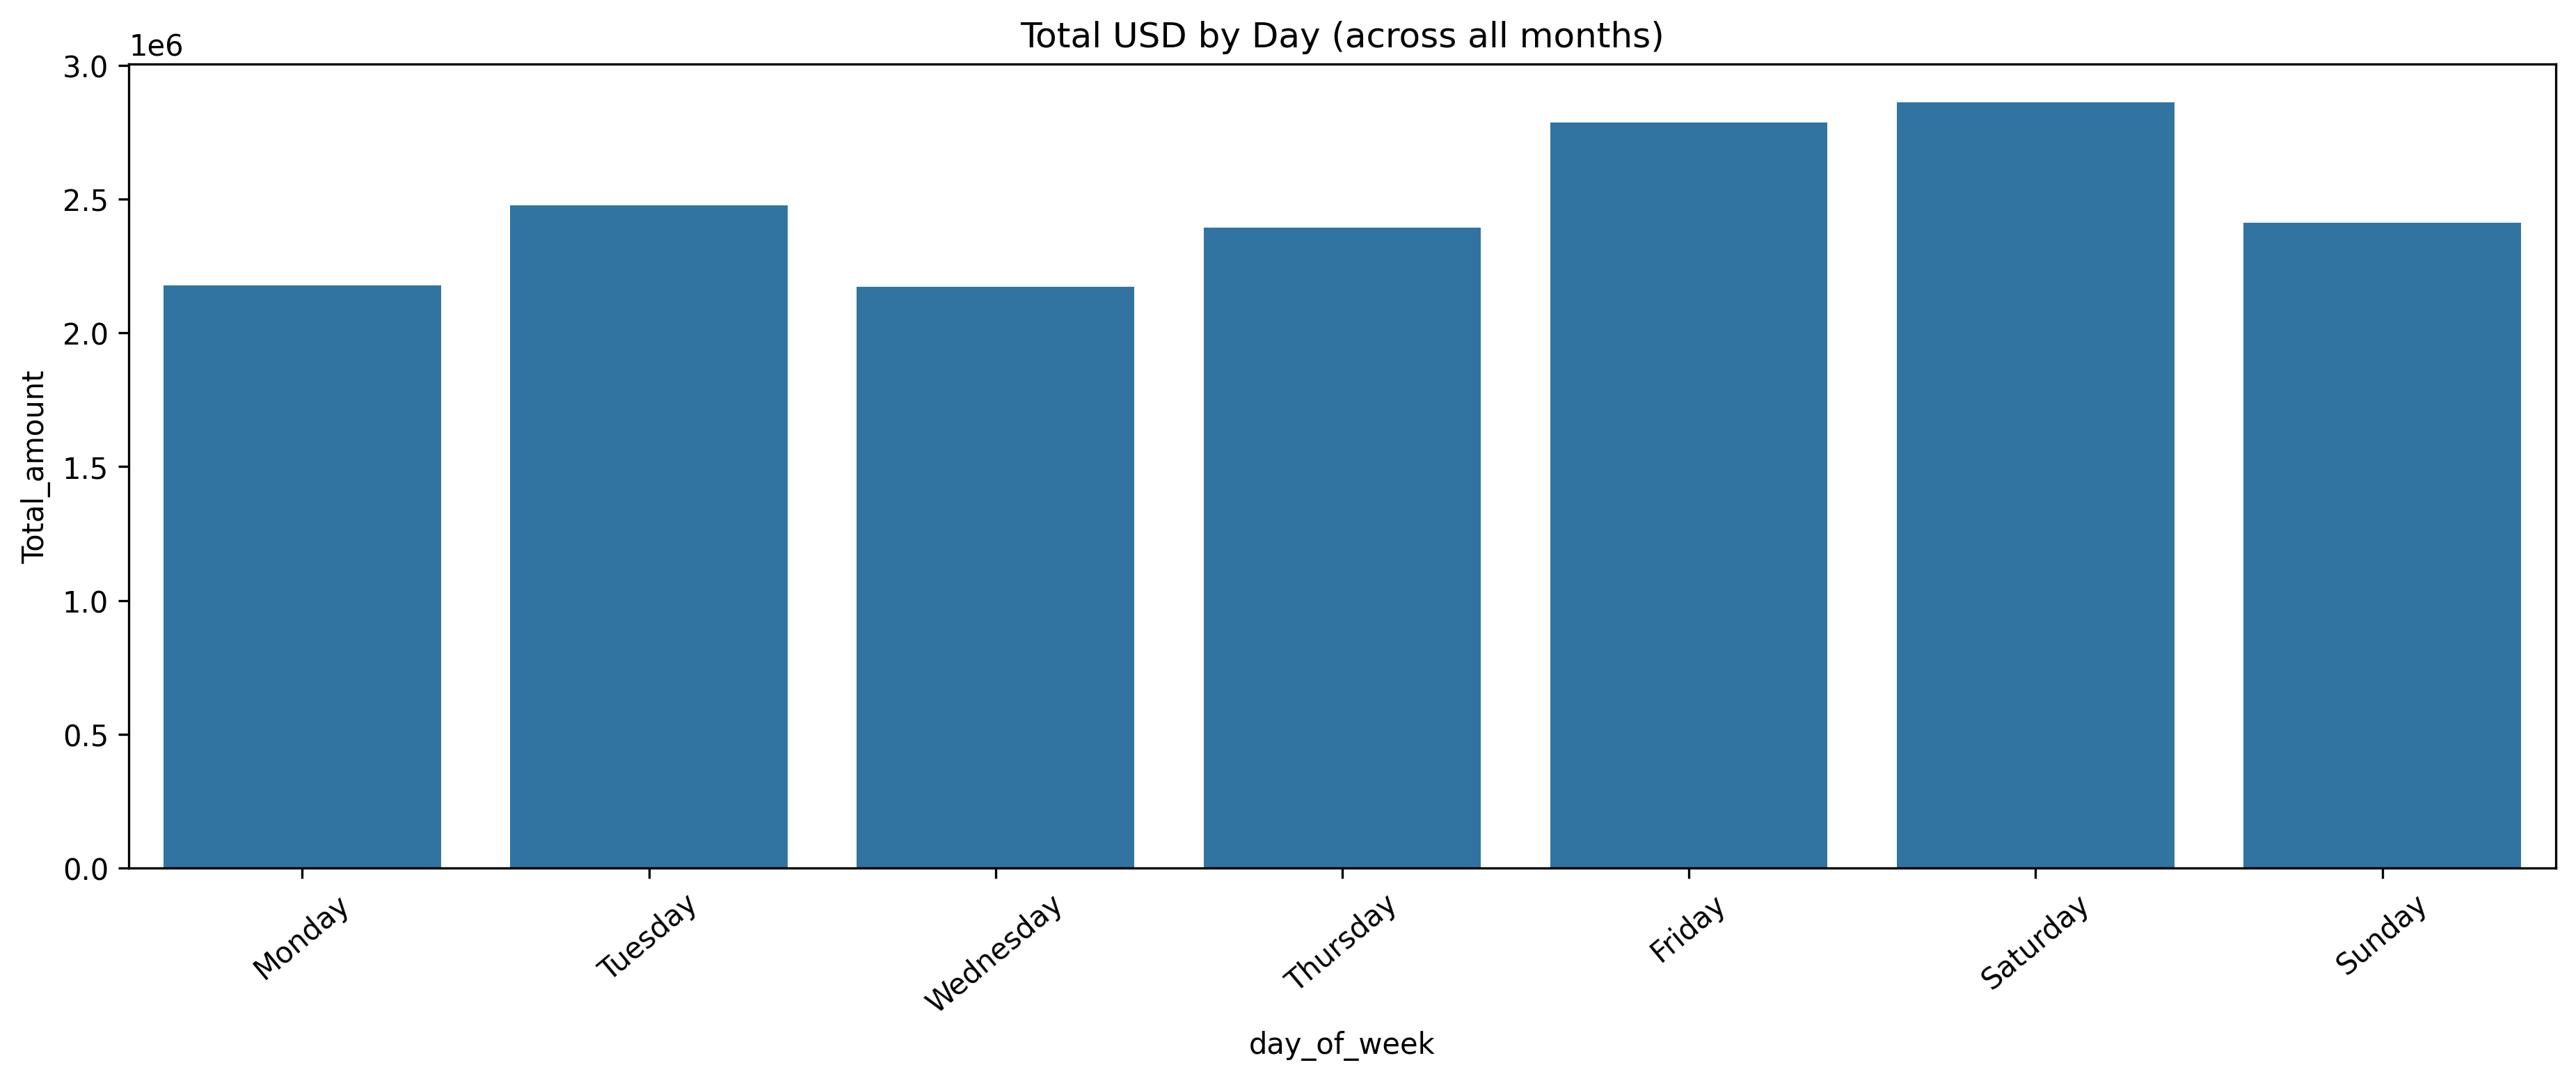

In [98]:
fig, ax= plt.subplots(1,1,figsize=(15,5), dpi=300)
sbn.barplot(data=dow, x='day_of_week', y='Total_amount', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=40)
ax.set_title('Total USD by Day (across all months)')
plt.show()

<Figure size 1000x1000 with 0 Axes>

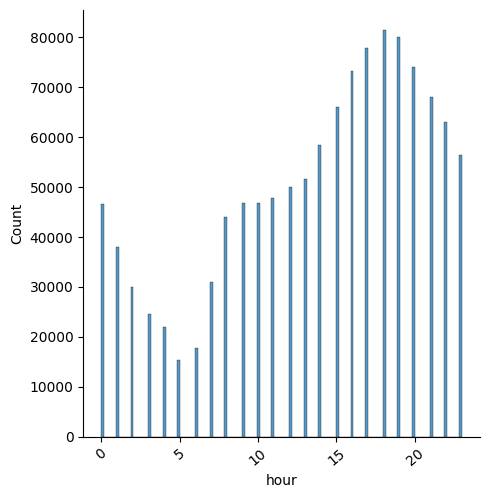

In [7]:
fig= plt.figure(figsize=(10,10))
sbn.displot(data=data,x=data.hour, kind='hist')
plt.xticks(rotation=40)
plt.show()

Text(0.5, 1.0, 'Total USD by Month & Hour of Day')

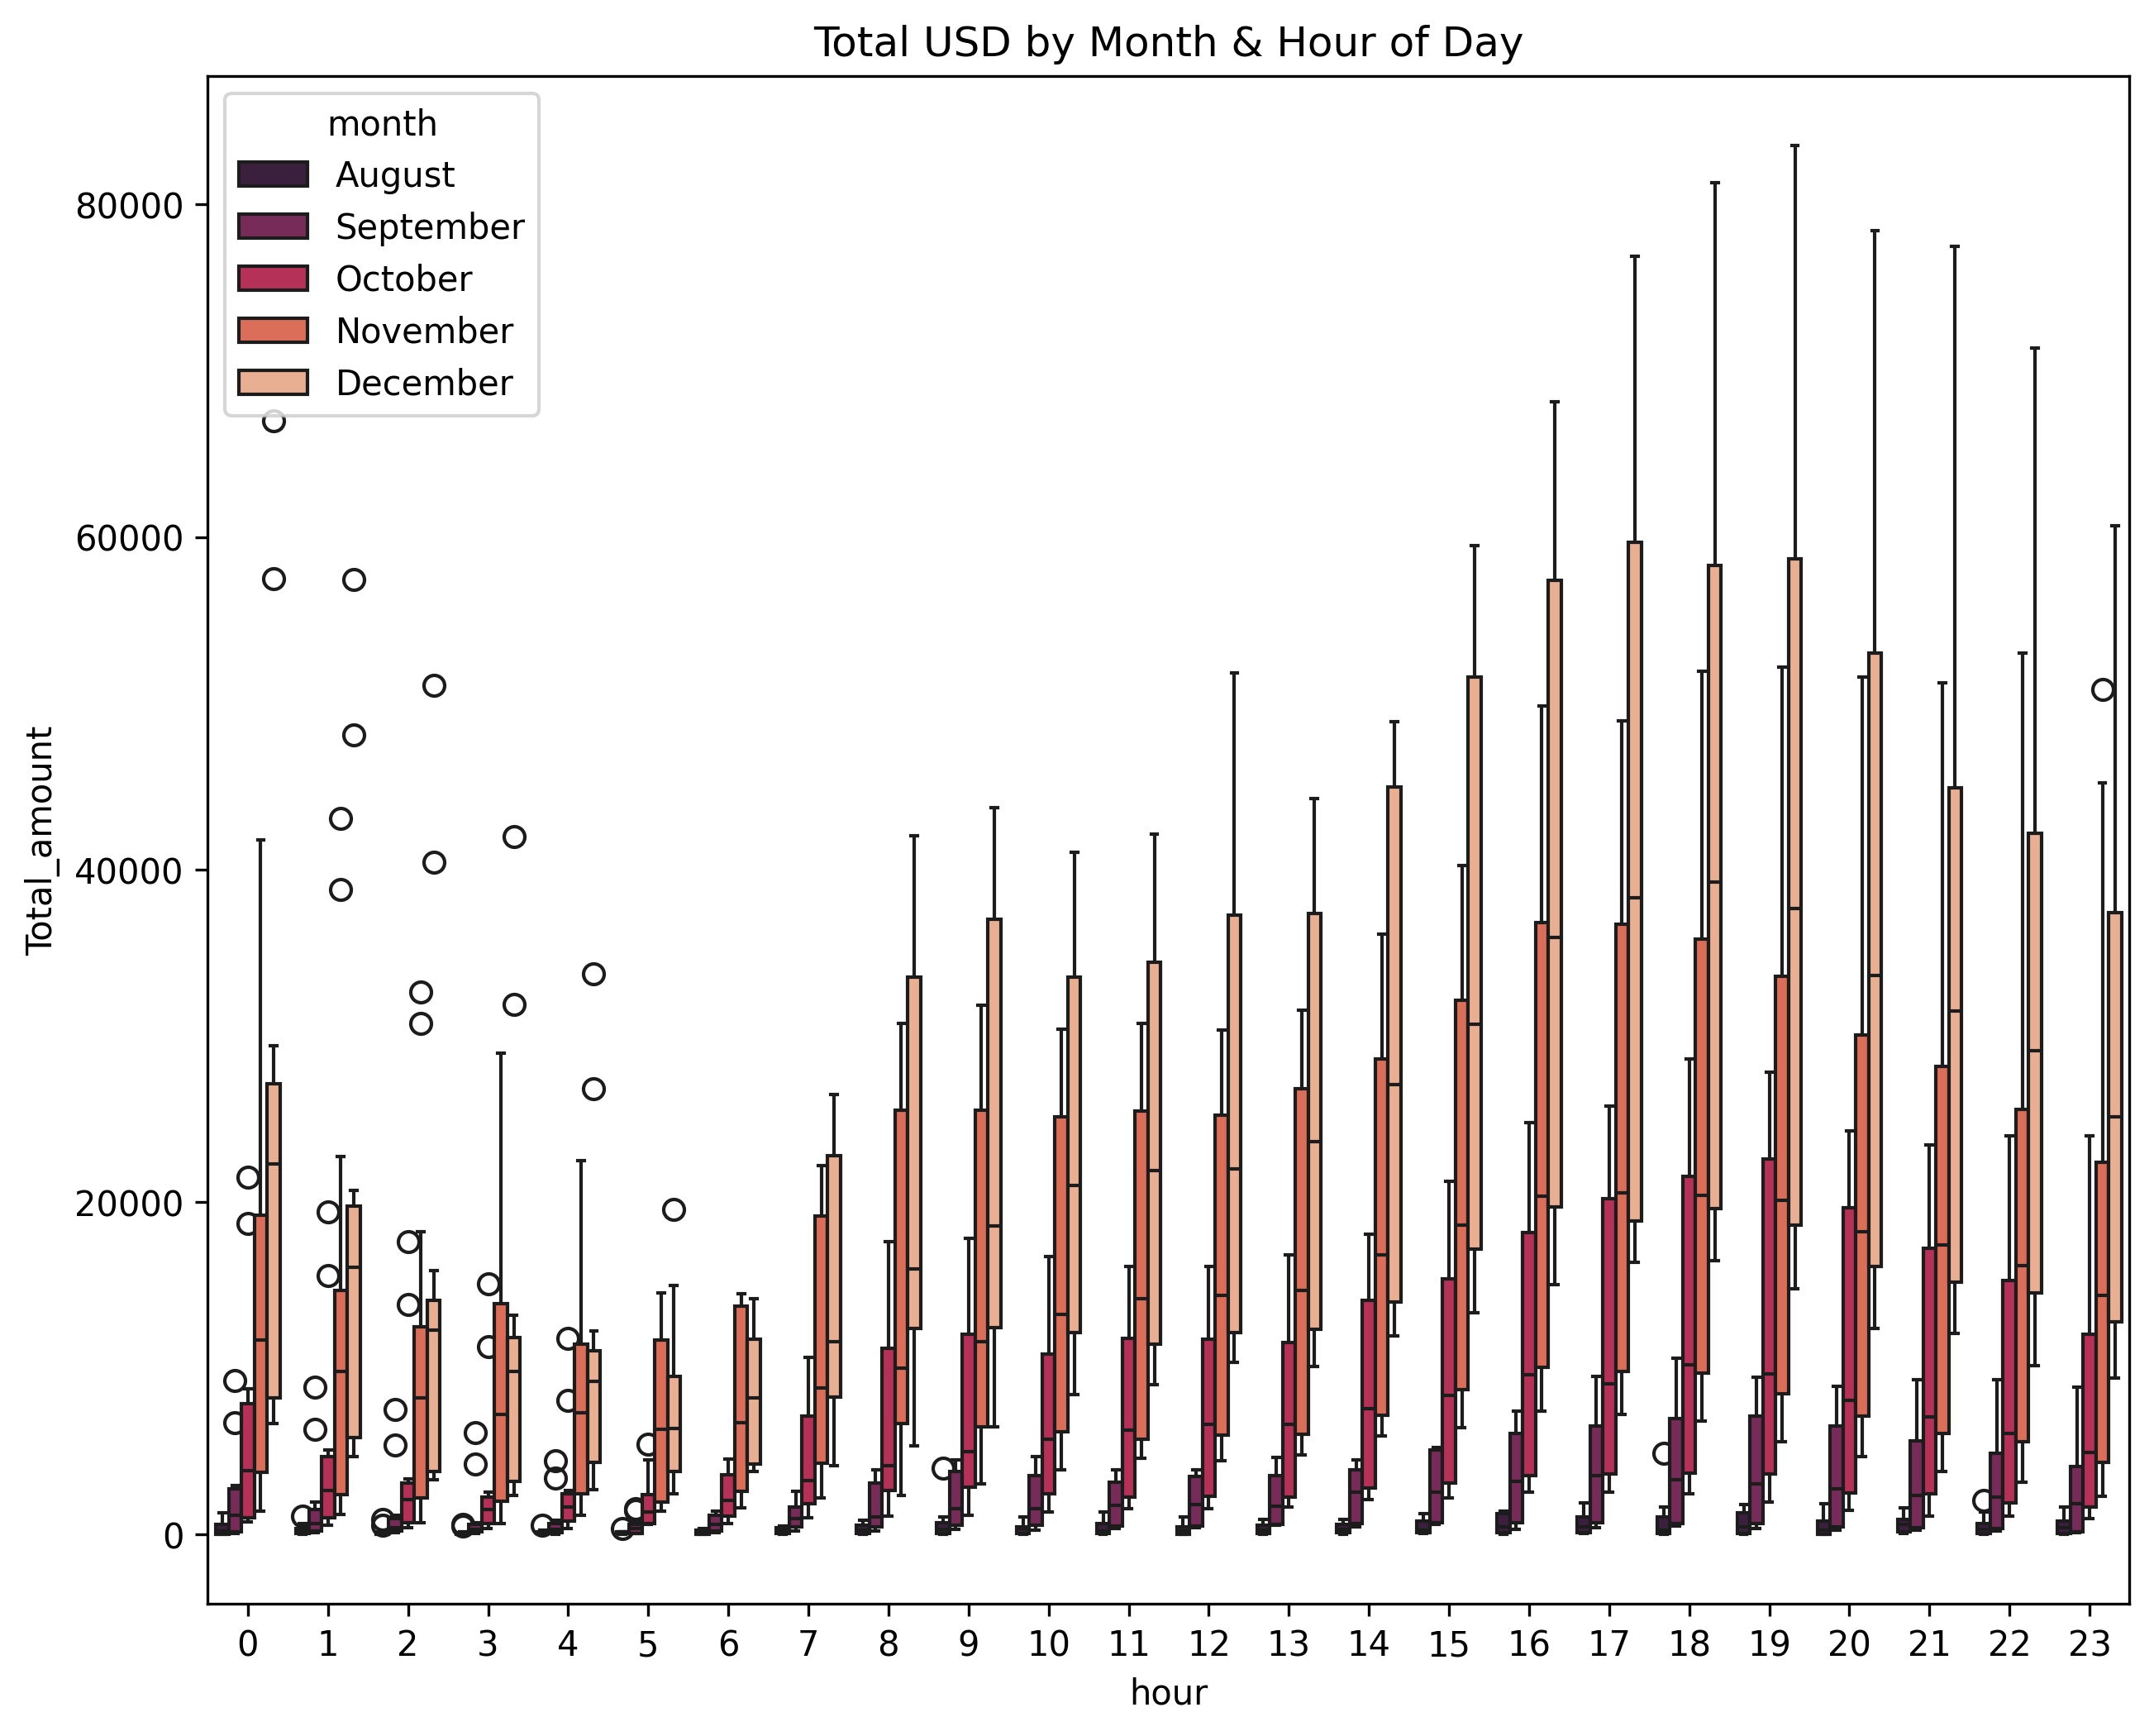

In [9]:
fig, ax = plt.subplots(figsize=(10,8), dpi=300)
# order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sbn.boxplot(data=mon_dow_hr, x='hour', y='Total_amount',hue='month', hue_order=['August','September','October','November','December'], palette='rocket')
ax.set_title('Total USD by Month & Hour of Day')

Text(0.5, 1.0, 'Total USD by Day & Month')

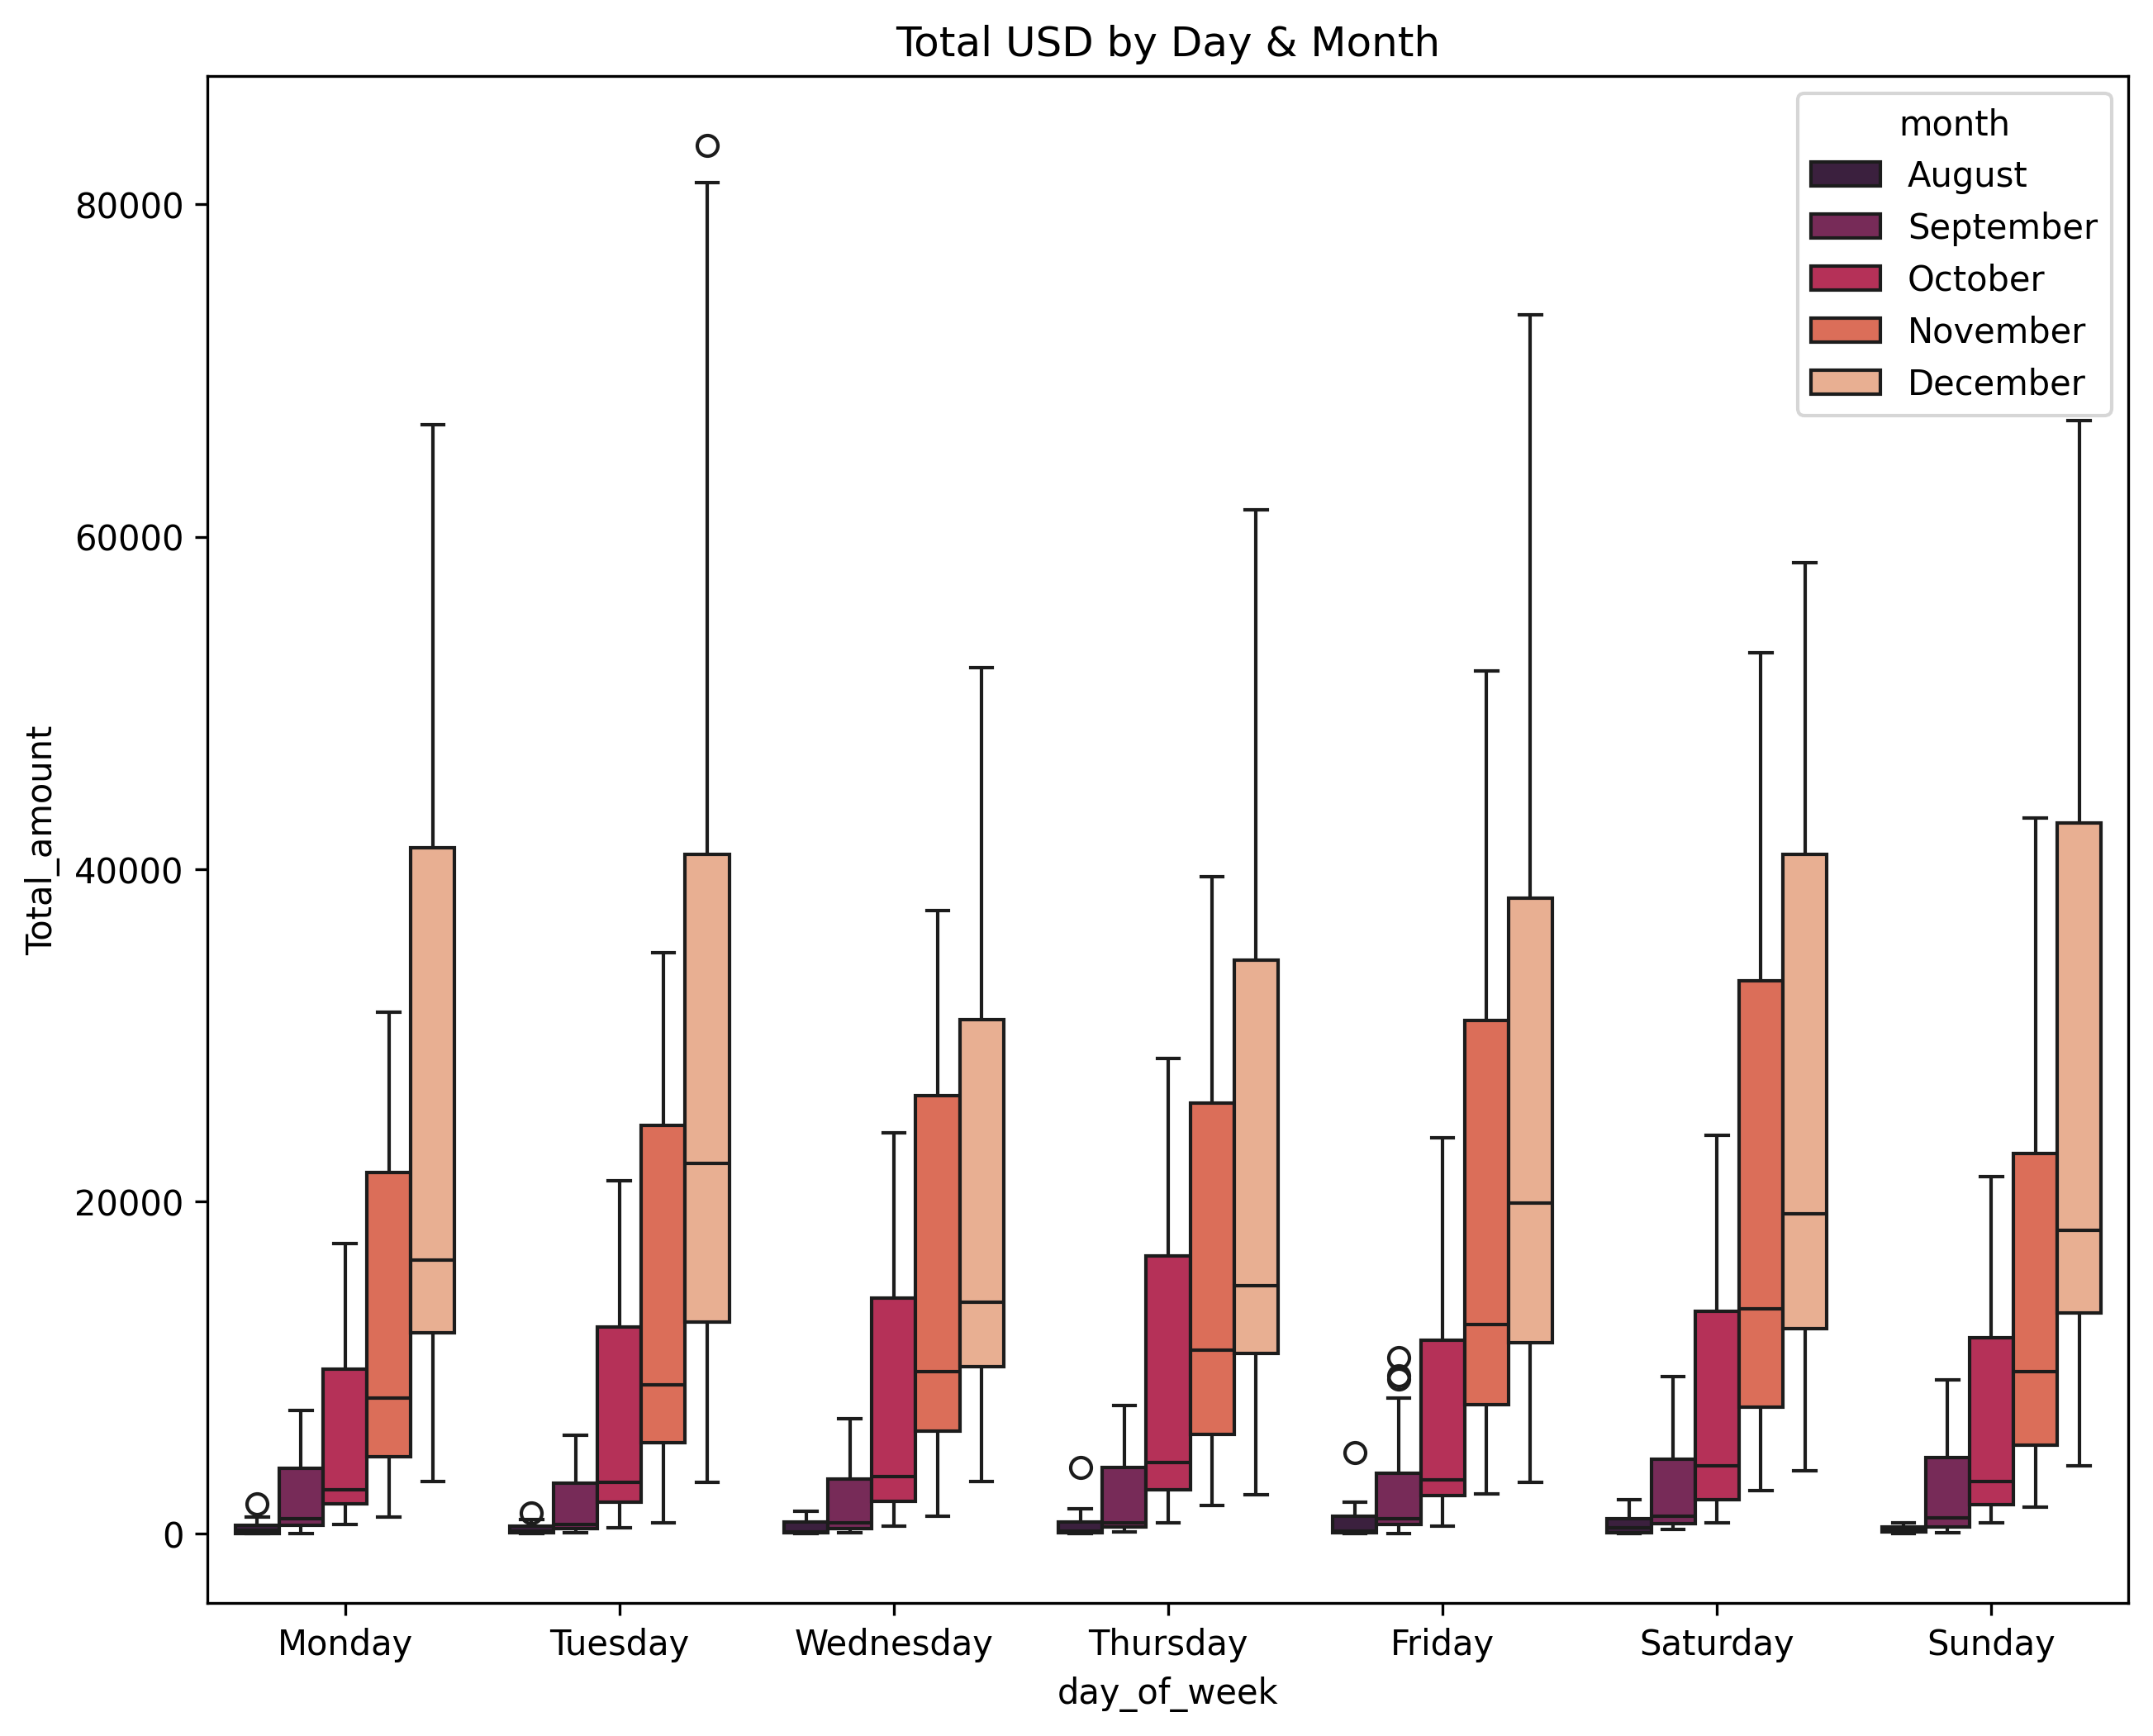

In [10]:
fig, ax = plt.subplots(figsize=(10,8),dpi=300)
sbn.boxplot(data=mon_dow_hr, x='day_of_week', y='Total_amount',hue='month',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=['August','September','October','November','December'], palette='rocket')
ax.set_title('Total USD by Day & Month')

In [37]:
(month[['Total_amount']] - month[['Total_amount']].shift(1)).div(month[['Total_amount']].shift(1))

,Total_amount
month,
August,NaN
September,5.231216
October,2.240518
November,1.207884
December,0.569253


In [34]:
# month.set_index('month', inplace=True)
month = month.loc[['August', 'September','October', 'November', 'December']]
(month.Total_amount - month.Total_amount.shift(1)).div(month.Total_amount.shift(1))*100

month
August              NaN
September    523.121610
October      224.051823
November     120.788407
December      56.925272
Name: Total_amount, dtype: float64

In [58]:
grp_mon = data.groupby('month')[['Total_amount']].agg(['count'])
grp_mon_count = grp_mon.loc[['August', 'September','October', 'November', 'December']].Total_amount

In [60]:
(grp_mon_count - grp_mon_count.shift(1)).div(grp_mon_count.shift(1))

,count
month,
August,NaN
September,5.512790
October,2.424336
November,1.240918
December,0.581628


In [84]:
num_trips = data.groupby(['month', 'day_of_week', 'hour']).Total_amount.agg(['count'])

num_trips = num_trips.groupby(level=[0]).sum().loc[['August', 'September','October', 'November', 'December']]

In [89]:
(num_trips['count']-num_trips['count'].shift(1)).div(num_trips['count'].shift(1))*100

month
August              NaN
September    551.279024
October      242.433581
November     124.091807
December      58.162762
Name: count, dtype: float64

<Axes: title={'center': 'Dist. of Total Amount for Vendor 1'}, ylabel='Density'>

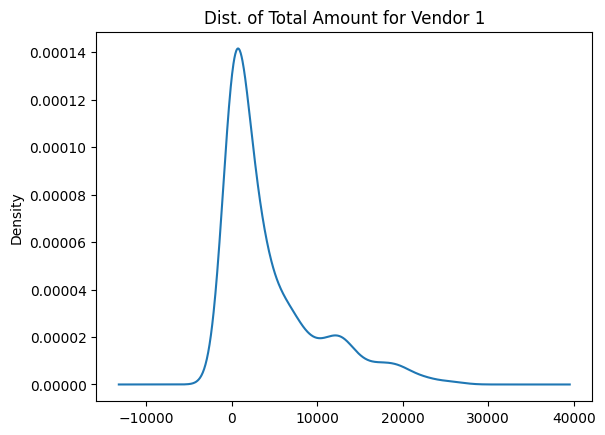

In [94]:
vend1 = mon_dow_hr[mon_dow_hr.vendor_id == 1]
vend1.Total_amount.plot(kind='kde', title='Dist. of Total Amount for Vendor 1')

In [95]:
vend1

,vendor_id,month,day_of_week,hour,Total_amount
0,1,August,Friday,0,12.00
1,1,August,Friday,2,21.00
2,1,August,Friday,3,20.00
3,1,August,Friday,6,11.50
4,1,August,Friday,7,112.90
...,...,...,...,...,...
792,1,September,Wednesday,19,633.55
793,1,September,Wednesday,20,377.15
794,1,September,Wednesday,21,288.20
795,1,September,Wednesday,22,236.93
